In [11]:
import pint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Quick check of cavitation issue on (redacted) pumps which are experiencing cavitation at suction tank levels

In [12]:
ureg.setup_matplotlib(True)
Q_ = ureg.Quantity

In [13]:
#Parameters

measured_liquid_level = Q_('18.9m')
measured_pressure_g = Q_('1.2 bar')
crude_density = Q_('834.1 kg / m^3')
g = Q_('9.81 m/s^2')
strainer_dp_normal = Q_('0.1 bar')
strainer_dp_alarm = Q_('0.3 bar')
crude_TVP = Q_('1 atm') + Q_('7 kPa')
existing_NPSHr = Q_('5 m')

In [14]:
levels = np.arange(3,24,1) * Q_('1 m')
levels

Magnitude,[ 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Units,m


In [15]:
expected_pressure_at_strainer_g = measured_pressure_g + ((levels - measured_liquid_level) * crude_density * g)
expected_pressure_at_strainer_g 

Magnitude,[-0.10102083900000003 -0.019195628999999936 0.06262958099999993 0.1444547909999998 0.2262800009999999 0.308105211 0.38993042099999997 0.47175563100000006 0.5535808409999999 0.635406051 0.717231261 0.799056471 0.880881681 0.9627068910000001 1.0445321010000002 1.126357311 1.2081825210000001 1.290007731 1.371832941 1.4536581510000002 1.5354833610000003]
Units,bar


In [16]:
expected_pressure_at_pump_normal_g = expected_pressure_at_strainer_g  - strainer_dp_normal
expected_pressure_at_pump_normal_a = expected_pressure_at_pump_normal_g + Q_('1 atm')
NPSHa_normal = (expected_pressure_at_pump_normal_a - crude_TVP) / (g * Q_('1000 kg / m^3'))
NPSHa_normal = NPSHa_normal.to('m')

In [17]:
expected_pressure_at_pump_alarm_g = expected_pressure_at_strainer_g  - strainer_dp_alarm
expected_pressure_at_pump_alarm_a = expected_pressure_at_pump_alarm_g + Q_('1 atm')
NPSHa_alarm = (expected_pressure_at_pump_alarm_a - crude_TVP) / (g * Q_('1000 kg / m^3'))
NPSHa_alarm = NPSHa_alarm.to('m')

In [18]:
df = pd.DataFrame([levels, NPSHa_alarm, NPSHa_normal])
df.index=['levels', 'NPSHa_alarm', 'NPSHa_normal']
df = df.transpose()
df.set_index('levels')


,NPSHa_alarm,NPSHa_normal
levels,,
3 m,-4.801435667686036 m,-2.7626996839959235 m
4 m,-3.967335667686035 m,-1.9285996839959223 m
5 m,-3.1332356676860367 m,-1.0944996839959236 m
6 m,-2.2991356676860377 m,-0.26039968399592606 m
7 m,-1.4650356676860368 m,0.5737003160040749 m
8 m,-0.6309356676860358 m,1.4078003160040757 m
9 m,0.2031643323139651 m,2.241900316004077 m
10 m,1.037264332313966 m,3.0760003160040776 m
11 m,1.8713643323139648 m,3.910100316004076 m


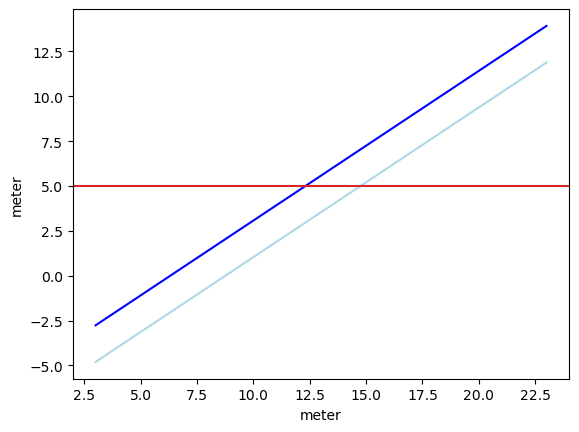

In [10]:
fig, ax = plt.subplots()
plt.plot(df['levels'], df['NPSHa_normal'], color = 'blue')
plt.plot(df['levels'], df['NPSHa_alarm'], color = 'lightblue')
ax.axhline(existing_NPSHr, color='tab:red')
